In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import requests
import gmaps
import os

# Import API key
from API_keys import g_key

In [132]:
merged_df = pd.read_csv("../mega_df.csv")
merged_df = merged_df.rename(columns={'continent':'Continent', 'country_code':'Country Code', 'country':'Country', 'consumption_per_capita_(L)':'Alcohol Consumption Per Capita (Liters)', 'climate':'Climate', 'main_export':'Main Export', 'main_industry':'Main Industry', 'region':'Region', 'happy_score':'Happiness Score', 'life_expectancy':'Life Expectancy', 'gdp_per_capita':'GDP per capita', 'mental_health_and_addiction (%)':'Mental Health Disorders (%)'})
merged_df

,Unnamed: 0,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,code,Mental Health Disorders (%)
0,0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463
1,1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610
2,2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388
3,3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869
4,4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,181,5128,Asia,UZB,Uzbekistan,2.7,"mostly mid-latitude desert, long, hot summers,...",Cotton,textiles,Commonwealth of Independent States,6.2576,65.107574,8.740372,UZB,10.897074
182,182,5129,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",Petroleum,petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,VEN,11.014506
183,183,5130,Oceania,WSM,Samoa,2.5,"tropical; rainy season (November to April), dr...",Coconut oil and cream,food processing,NaN,NaN,NaN,NaN,WSM,11.152716
184,184,5131,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,Crude oil,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,YEM,15.819471


In [133]:
updated_df=merged_df.drop(['Unnamed: 0', 'code'], axis=1)
updated_df.head()

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,14.726869
4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,12.498281


In [134]:
updated_df["Main Export"].value_counts().head(20)

Oil                                  11
Machinery and transport equipment     8
Petroleum                             8
Coffee                                7
Crude oil                             5
Cotton                                5
Manufactured goods                    5
Diamonds                              4
Gold                                  4
Machinery and equipment               3
Fish and fish products                3
Sugar                                 3
Cocoa                                 3
Bananas                               3
Bauxite                               3
Fish                                  3
Machinery                             3
Tobacco                               2
Copra                                 2
Agricultural products                 2
Name: Main Export, dtype: int64

In [135]:
# updated_df["Main Export"] = np.where(updated_df['group'].isin(['B','G','H']), 'NC',
# updated_df$group=as.character(updated_df$group)
# updated_df$group[c(3:4,13:16)]='NC'
# updated_df$group[c(1:2)]='PC'
# updated_df$group[c(5:12)]='NON'
# updated_df["Main Export"] = np.where(updated_df['Main Export'].isin(['B','G','H']), 'Petroleum',
#               np.where(updated_df['Main Export'] == 'A', 'PC', 'NON'))
# updated_df["Main Export"] = np.where(updated_df["Main Export"].isin(["petroleum"]),"Petroleum")
# updated_df.sample(30)

ValueError: either both or neither of x and y should be given

In [162]:
updated_df = updated_df.replace(
    {"Crude oil": "Petroleum", "Oil": "Petroleum", "Textile products":"Textiles and clothing", "Fish":"Agricultural products", "Aluminium":"Semi-precious metals", "Vehicles":"Machinery", "Bauxite and alumina":"Semi-precious metals", "Fuels and fuel products":"Petroleum", "Soyabeans":"Agricultural products", "Garments":"Textiles and clothing", "Clothing":"Textiles and clothing", "Computers and electrical machinery":"Machinery", "Machinery and electrical equipment":"Machinery", "Peetroleum":"Petroleum", "Copra":"Semi-precious metals", "Clothing and textiles":"Textiles and clothing", "Petroleum and petroleum products":"Petroleum", "Fish and fish products":"Agricultural products", "Machinery and transport equipment":"Machinery", "Machinery and equipment":"Machinery", "Machinery and electronics":"Machinery", "Bananas":"Agricultural products", "Sugar":"Agricultural products", "Fruit":"Agricultural products", "Coffee":"Agricultural products", "Food including rice":"Agricultural products", "Tobacco products": "Manufactured goods", "Ores and metals":"Semi-precious metals", "Foodstuffs":"Agricultural products", "Tobacco":"Agricultural products", "Vanilla": "Agricultural products", "Cocoa":"Agricultural products", "Bauxite":"Semi-precious metals", "Nickel":"Semi-precious metals", "Copper":"Semi-precious metals", "Tea":"Agricultural products", "Diamonds":"Precious stones and metals", "Gold":"Precious stones and metals"})
updated_df.fillna(method='ffill')
updated_df

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Petroleum,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Manufactured goods,tourism,NaN,NaN,NaN,NaN,14.726869
4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Petroleum,petroleum,NaN,NaN,NaN,NaN,12.498281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,5128,Asia,UZB,Uzbekistan,2.7,"mostly mid-latitude desert, long, hot summers,...",Cotton,textiles,Commonwealth of Independent States,6.2576,65.107574,8.740372,10.897074
182,5129,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",Petroleum,petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,11.014506
183,5130,Oceania,WSM,Samoa,2.5,"tropical; rainy season (November to April), dr...",Coconut oil and cream,food processing,NaN,NaN,NaN,NaN,11.152716
184,5131,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,Petroleum,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,15.819471


In [147]:
updated_df["Main Export"].value_counts().head(30)

Agricultural products                 35
Petroleum                             27
Machinery                             19
Semi-precious metals                  12
Textiles and clothing                  9
Precious stones and metals             8
Manufactured goods                     6
Cotton                                 5
Phosphates                             2
Water                                  1
Steel products                         1
Military equipment                     1
Re-exports                             1
Electronic equipment                   1
Processed and unprocessed diamonds     1
Meat                                   1
Uranium                                1
Light manufactures                     1
Timber                                 1
Chromium and chrome products           1
Livestock                              1
Sugar and molasses                     1
Computer software                      1
Foodstuffs and tobacco                 1
Shoes           

In [148]:
top_export_data = updated_df.loc[(updated_df["Main Export"]=="Petroleum") | (updated_df["Main Export"]=="Machinery") | (updated_df["Main Export"]=="Semi-precious metals") | (updated_df["Main Export"]=="Textiles and clothing") | (updated_df["Main Export"]=="Precious stones and metals") | (updated_df["Main Export"]=="Manufactured goods")]
top_export_data

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Petroleum,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,4943,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Manufactured goods,tourism,NaN,NaN,NaN,NaN,14.726869
4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Petroleum,petroleum,NaN,NaN,NaN,NaN,12.498281
5,4945,North America,ATG,Antigua and Barbuda,7.0,tropical maritime; little seasonal temperature...,Textiles and clothing,tourism,NaN,NaN,NaN,NaN,13.159940
6,4946,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",Petroleum,petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,5124,Africa,TZA,Tanzania,9.4,varies from tropical along coast to temperate ...,Precious stones and metals,agricultural processing (sugar,Sub-Saharan Africa,3.4762,57.496075,7.967665,12.637257
178,5125,North America,USA,United States,9.8,"mostly temperate, but tropical in Hawaii and F...",Machinery,highly diversified,North America and ANZ,6.9396,68.299500,10.925769,17.080892
182,5129,South America,VEN,Venezuela,5.6,"tropical; hot, humid; more moderate in highlands",Petroleum,petroleum,Latin America and Caribbean,5.0532,66.505341,8.977794,11.014506
184,5131,Asia,YEM,Yemen,0.1,mostly desert; hot and humid along west coast;...,Petroleum,crude oil production and petroleum refining,Middle East and North Africa,3.5274,56.727283,7.759683,15.819471


In [150]:
top_export_data_grouped=top_export_data.groupby("Main Export")[["Alcohol Consumption Per Capita (Liters)"]].mean()
top_export_data_grouped

,Alcohol Consumption Per Capita (Liters)
Main Export,
Machinery,10.510526
Manufactured goods,10.050000
Petroleum,4.033333
Precious stones and metals,6.537500
Semi-precious metals,5.091667
Textiles and clothing,5.933333


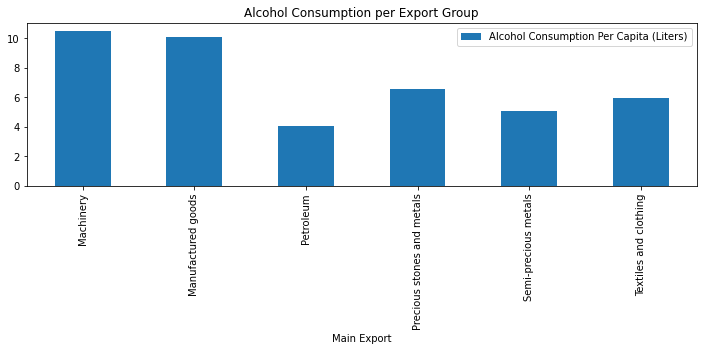

In [154]:
# plt.bar(top_export_data_grouped, color='r', alpha=0.5, align="center")
top_export_data_grouped.plot(kind='bar', figsize=(12,3), title ='Alcohol Consumption per Export Group')

In [174]:
gdp_and_life_expectancy_df=updated_df.dropna(subset=['GDP per capita', 'Life Expectancy'])
gdp_and_life_expectancy_df.head()

,index,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Export,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463
1,1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Petroleum,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
6,4946,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",Petroleum,petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815
7,4948,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,Food and live animals,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235


In [186]:
gdp_and_life_expectancy_df["Main Industry"].value_counts().head(25)

tourism                                                              10
textiles                                                              9
petroleum                                                             8
food processing                                                       8
sugar                                                                 5
mining                                                                4
construction                                                          2
oil                                                                   2
aluminum                                                              2
petroleum and natural gas                                             2
fish processing                                                       2
electronics                                                           2
machinery                                                             2
steel                                                           

In [182]:
petroleum_export_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Main Export"]=="Petroleum")]

In [183]:
tourism_industry_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Main Industry"]=="tourism")]

In [177]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Alcohol Consumption per capita (liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.02243149998395879


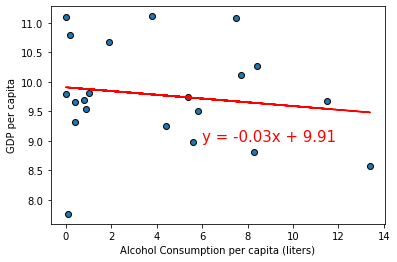

In [178]:
x_values=petroleum_export_data['Alcohol Consumption Per Capita (Liters)']
y_values=petroleum_export_data['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))

The r-value is: 0.05539256646528223


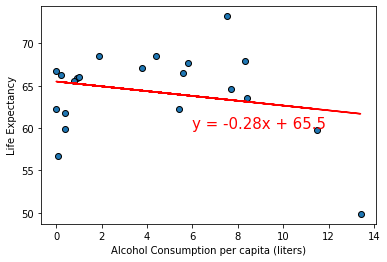

In [187]:
x_values=petroleum_export_data['Alcohol Consumption Per Capita (Liters)']
y_values=petroleum_export_data['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,60))

The r-value is: 0.4892647885189892


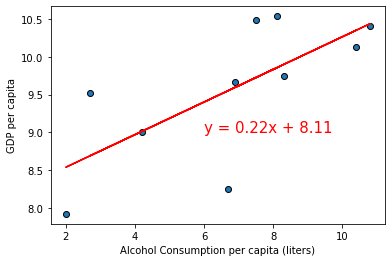

In [184]:
x_values=tourism_industry_data['Alcohol Consumption Per Capita (Liters)']
y_values=tourism_industry_data['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))

The r-value is: 0.2656629957750637


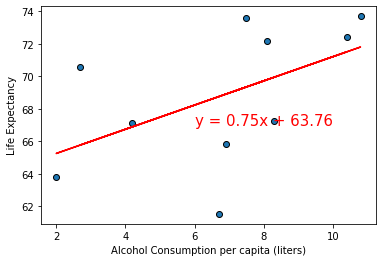

In [198]:
x_values=tourism_industry_data['Alcohol Consumption Per Capita (Liters)']
y_values=tourism_industry_data['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,67))

The r-value is: 0.20507265852518977


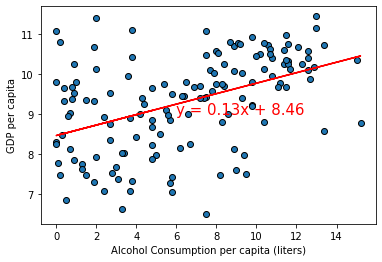

In [179]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))

The r-value is: 0.15718368589991474


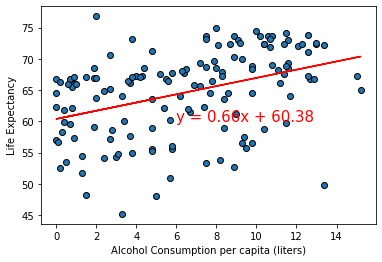

In [180]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,60))

In [160]:
city_data_df = pd.read_csv("cities.csv")
city_data_df.sample(25)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
178,178,pacific grove,36.62,-121.92,5.64,81,1,1.54,US,1609519423
524,524,lazaro cardenas,17.96,-102.20,27.29,33,0,1.29,MX,1609519555
42,42,ambunti,-4.24,142.84,22.80,96,100,0.53,PG,1609519508
685,813,nuuk,64.18,-51.72,23.00,85,100,9.17,GL,1609532494
757,917,acarau,-2.89,-40.12,83.79,67,89,17.00,BR,1609532666
902,1111,bay city,43.59,-83.89,29.84,80,90,9.17,US,1609532610
521,521,mogadishu,2.04,45.34,25.81,78,97,8.20,SO,1609519487
511,511,henties bay,-22.12,14.28,17.78,84,97,2.24,NaN,1609519554
911,1121,taoudenni,22.68,-3.98,66.09,24,0,9.17,ML,1609532683
397,397,ketchikan,55.34,-131.65,3.00,100,90,8.20,US,1609519518


In [193]:
group1 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "tourism"]["Alcohol Consumption Per Capita (Liters)"]
group2 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "textiles"]["Alcohol Consumption Per Capita (Liters)"]
group3 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "petroleum"]["Alcohol Consumption Per Capita (Liters)"]
group4 = gdp_and_life_expectancy_df[gdp_and_life_expectancy_df["Main Industry"] == "food processing"]["Alcohol Consumption Per Capita (Liters)"]

In [194]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=4.390411881822701, pvalue=0.010961156364986614)

In [196]:
main_industry_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Main Industry"]=="tourism") | (gdp_and_life_expectancy_df["Main Industry"]=="textiles") | (gdp_and_life_expectancy_df["Main Industry"]=="petroleum") | (gdp_and_life_expectancy_df["Main Industry"]=="food processing")]

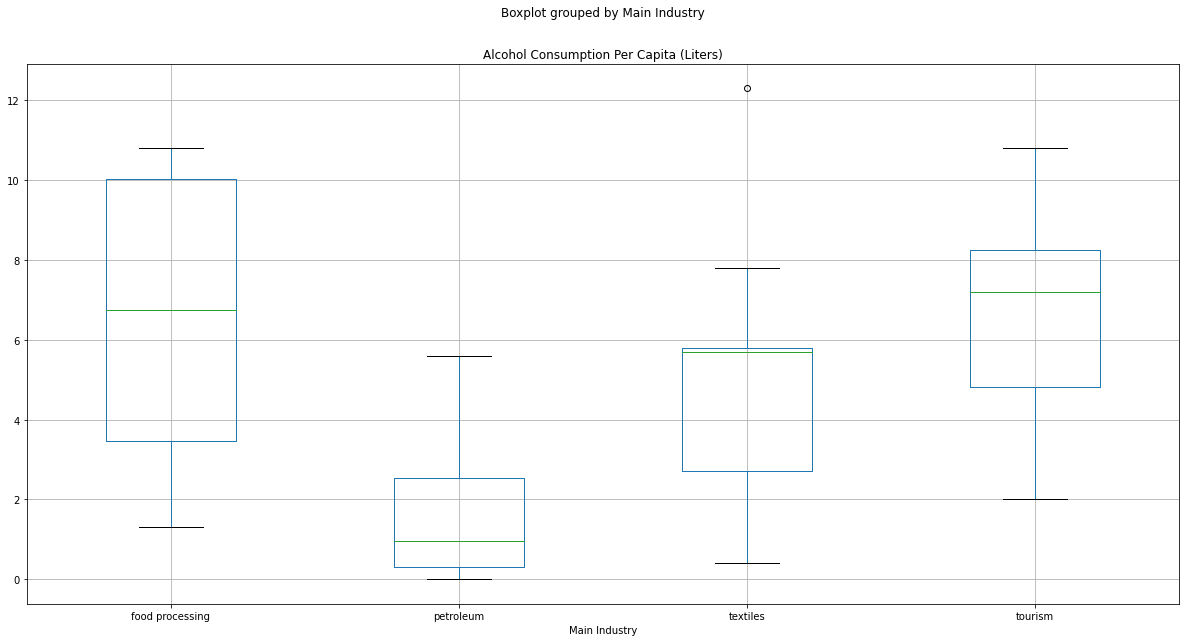

In [197]:
main_industry_data.boxplot("Alcohol Consumption Per Capita (Liters)", by="Main Industry", figsize=(20, 10))